In [64]:
import pandas as pd
import numpy as np
import re
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from urllib.parse import urlparse
from imblearn.over_sampling import SMOTE

In [65]:
data = pd.read_csv('malicious_urls.csv')

# Map labels to integers
label_mapping = {'benign': 0, 'phishing': 1, 'defacement': 2}
data['label'] = data['type'].map(label_mapping)

In [66]:
def extract_features(url):
    features = {}
    
    # URL length
    features['url_length'] = len(url)
    
    # Check for IP address
    features['has_ip'] = 1 if re.search(r'\d+\.\d+\.\d+\.\d+', url) else 0
    
    # Number of subdomains
    features['num_subdomains'] = url.count('.')
    
    # Presence of suspicious words
    suspicious_words = ['login', 'paypal', 'secure', 'bank', 'phishing']
    features['has_suspicious_words'] = 1 if any(word in url for word in suspicious_words) else 0
    
    # Special characters in URL
    features['num_special_chars'] = len(re.findall(r'[^a-zA-Z0-9./:_-]', url))
    
    # URL Entropy
    entropy = 0
    for char in set(url):
        prob = url.count(char) / len(url)
        entropy -= prob * math.log(prob, 2)
    features['url_entropy'] = entropy

    return features

In [67]:
data.describe()

label
count  618671.000000
mean        0.463938
std         0.748679
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000

In [68]:
features_df = pd.DataFrame([extract_features(url) for url in data['url']])

# Add the 'label' column
features_df['label'] = data['label']

# Drop rows with NaN values in 'label' column
features_df = features_df.dropna(subset=['label'])


In [76]:
X = features_df.drop('label', axis=1)
y = features_df['label']

In [77]:
if y.isnull().sum() > 0:
    print("Missing values found in target (y). Dropping corresponding rows.")
    valid_indices = y.notnull()
    X = X[valid_indices]
    y = y[valid_indices]


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


NameError: name 'X_resampled' is not defined

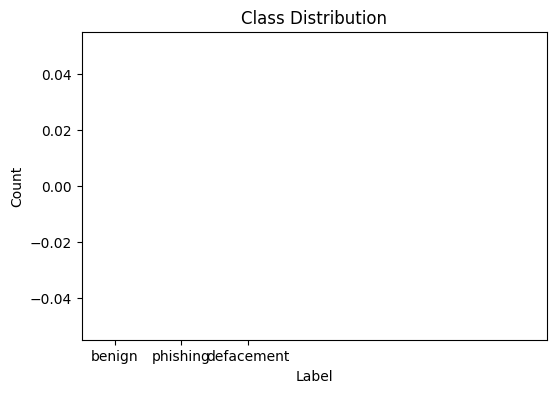

In [55]:
# Label Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=features_df['label'])
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=label_mapping.keys())
plt.show()



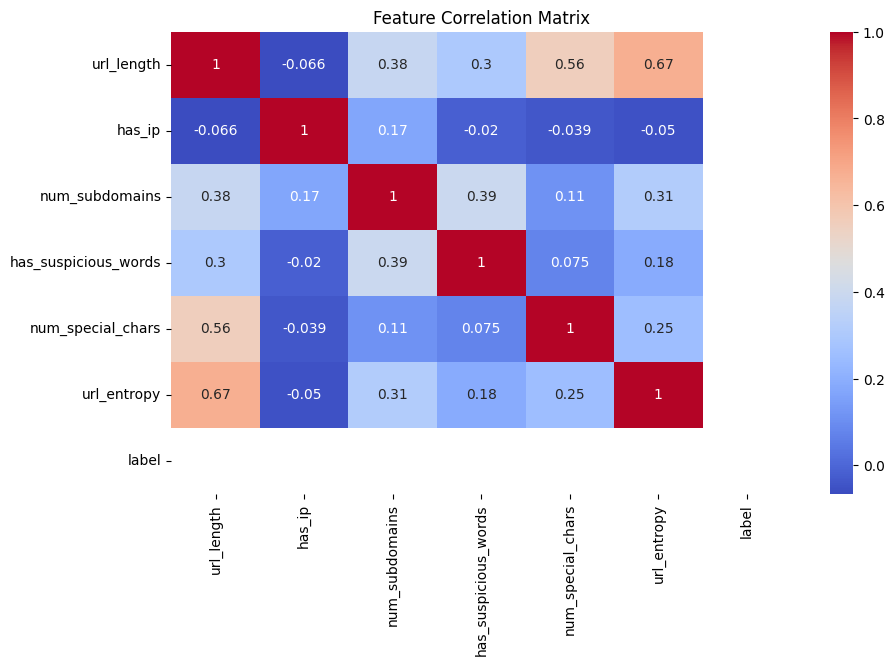

In [56]:
# Feature Correlations
correlation_matrix = features_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()



ValueError: List of boxplot statistics and `positions` values must have same the length

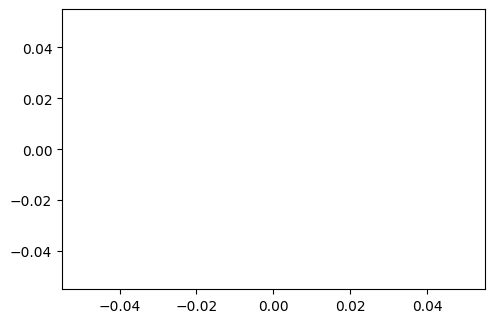

In [58]:
# Plot a smaller subset of features first
columns_to_plot = features_df.columns[:-1][:3]  # Only take the first 3 features for testing
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=features_df['label'], y=features_df[column])
    plt.title(f"{column} vs Label")
plt.tight_layout()
plt.show()


In [48]:
# Split the dataset
X = features_df.drop('label', axis=1)
y = features_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [51]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(X_train.head())  # If X_train is a DataFrame


X_train shape: (0, 6)
y_train shape: (0,)
Empty DataFrame
Columns: [url_length, has_ip, num_subdomains, has_suspicious_words, num_special_chars, url_entropy]
Index: []


In [52]:
print(X_train.isnull().sum())  # If X_train is a DataFrame


url_length              0
has_ip                  0
num_subdomains          0
has_suspicious_words    0
num_special_chars       0
url_entropy             0
dtype: int64


In [53]:
# Train the RandomForest model with optimizations
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)  # n_estimators=100 for fewer trees
model.fit(X_train, y_train)

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by RandomForestClassifier.

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))


In [ ]:
while True:
    user_input = input("Enter URLs separated by commas (or type 'exit' to quit): ").strip()
    if user_input.lower() == 'exit':
        print("Exiting...")
        break

    # Split the input into a list of URLs
    user_urls = [url.strip() for url in user_input.split(',')]
    
    # Extract features for user-input URLs
    user_features = pd.DataFrame([extract_features(url) for url in user_urls])
    
    # Predict using the trained model
    user_predictions = model.predict(user_features)
    
    # Display results
    for url, pred in zip(user_urls, user_predictions):
        predicted_label = list(label_mapping.keys())[list(label_mapping.values()).index(pred)]
        print(f"URL: {url}, Prediction: {predicted_label}")